In [179]:
import pandas as pd
from scipy.stats import pearsonr
data = pd.read_csv("table.how_similar.nok.txt", sep='\t')

In [180]:
data['bin_sz'] = pd.cut(data['szsim'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])
data['bin_sim'] = pd.cut(data['unroll'], [0, 0.80, 0.85, 0.90, 0.95, 1.01], labels=["<0.8", "0.85", "0.90", "0.95", "1"])

In [181]:
data['bin_len'] = pd.cut(data['sz1'], [0, 50, 100, 500, 1000, 900000], labels=["0", "50", "100", "1000", "big"])

In [182]:
len(data)

904

In [176]:
print(pearsonr(data['seqsim'], data['pj']))

PearsonRResult(statistic=0.953444540233332, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of sequence similarity'),
 Text(0.5, 0, 'Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

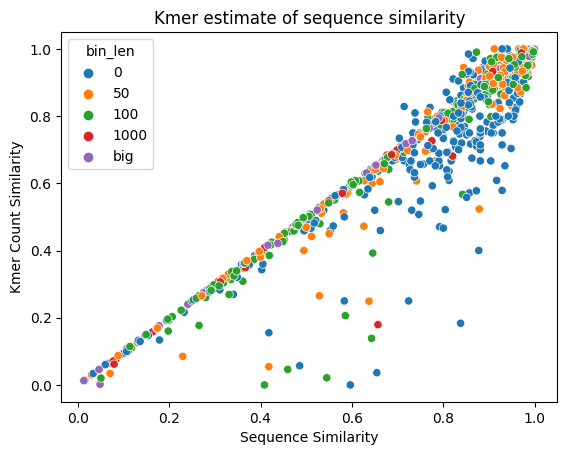

In [183]:
import seaborn as sb
p = sb.scatterplot(data=data, x='seqsim', y='pj', hue='bin_len')
p.set(title="Kmer estimate of sequence similarity", xlabel="Sequence Similarity", ylabel="Kmer Count Similarity")

In [166]:
print(pearsonr(data['unroll'], data['pj']))

PearsonRResult(statistic=0.9361582055174525, pvalue=0.0)


[Text(0.5, 1.0, 'Kmer estimate of unroll sequence similarity'),
 Text(0.5, 0, 'Unroll Sequence Similarity'),
 Text(0, 0.5, 'Kmer Count Similarity')]

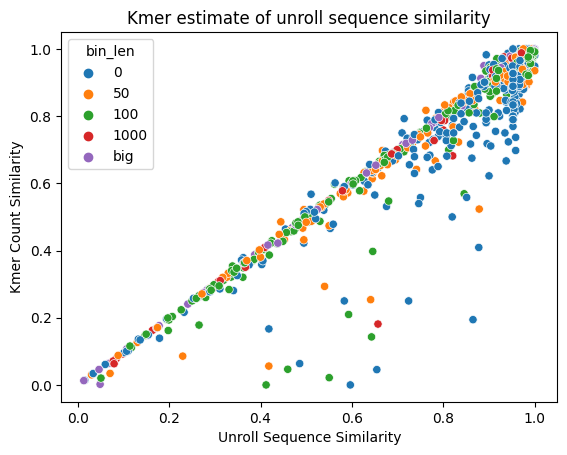

In [178]:
import seaborn as sb
p = sb.scatterplot(data=data, x='unroll', y='pj', hue='bin_len')
p.set(title="Kmer estimate of unroll sequence similarity", xlabel="Unroll Sequence Similarity", ylabel="Kmer Count Similarity")